In [1]:
#A program using nueral ntworks to recognize hand written digits

First of all we going to import all nessecery libraries we need


In [2]:
#imports
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

Now we going to load the data set


In [5]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

11501568/11490434 [==============================] - 0s 0us/step


Start making our model


In [6]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


Fit our model

In [13]:
model.fit(x_train, y_train, epochs=50)
model.save('handwritten.model')

Epoch 1/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0536 - accuracy: 0.9827
Epoch 2/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0433 - accuracy: 0.9853
Epoch 3/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0313 - accuracy: 0.9896
Epoch 4/50
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0268 - accuracy: 0.9915
Epoch 5/50
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0219 - accuracy: 0.9925
Epoch 6/50
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0181 - accuracy: 0.9937
Epoch 7/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0165 - accuracy: 0.9943
Epoch 8/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0136 - accuracy: 0.9955
Epoch 9/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0132 - accuracy: 0.9954
Epoch 10/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.010

Print our loss and accuracy. The < loss is the better and the > the accuracy is the better

In [14]:
loss, accuracy = model.evaluate(x_test, y_test)
print(loss)
print(accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.2516 - accuracy: 0.9705
0.2515617907047272
0.9704999923706055


Pass images to program 

------------------------------------------------
This digit is probably a 3


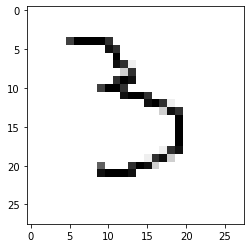

------------------------------------------------
This digit is probably a 3


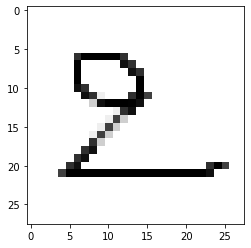

------------------------------------------------
This digit is probably a 7


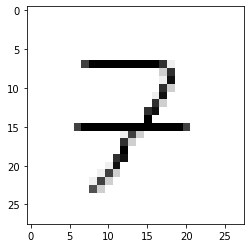

------------------------------------------------
This digit is probably a 2


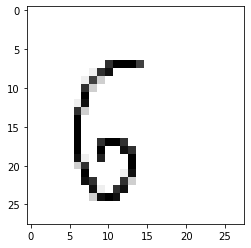

------------------------------------------------
This digit is probably a 1


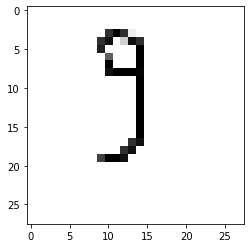

In [15]:
image_number = 1
while os.path.isfile(f"digits/digit{image_number}.png"):
  try:
    img = cv2.imread(f"digits/digit{image_number}.png")[:,:,0]
    img = np.invert(np.array([img]))
    pred = model.predict(img)
    print("------------------------------------------------")
    print(f"This digit is probably a {np.argmax(pred)}")
    plt.imshow(img[0], cmap=plt.cm.binary)
    plt.show()
  except:
    print("ERROR!")
  finally:
    image_number += 1